# Steps
Alice is sending information to Bob
1. Create an entangled pair q1 and q2
2. Alice own q1 and Bob owns q2
3. q0 is being sent
4. q1 is CNOT controlled by q0
5. Alice applied Hadamard to q0 and then measures both q1 and q0
6. Alice then uses a classical channel say a phone call and tells bob the outcome of her two qubit measurement
7. Bob then applies some gates based on Alice's call
    00 -> do nothing
    01 -> Apply X
    10 -> Apply Z
    11 -> Apply ZX
8. q3 has been teleported to Bob from Alice


In [28]:
'''Alice is given a secret state'''
secret = 'hz'

In [29]:
import qiskit as qk
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute, Aer, IBMQ
from qiskit.tools.visualization import plot_histogram

In [30]:
def apply_secret_unitary(secret_unitary, qubit, quantum_circuit, dagger):
    functionmap = {
                    'x':quantum_circuit.x,
                    'y':quantum_circuit.y,
                    'z':quantum_circuit.z,
                    'h':quantum_circuit.h,                    
                    't':quantum_circuit.t,                    
    }
    if dagger: functionmap['t'] = quantum_circuit.tdg
    
    if dagger:
        [functionmap[unitary](qubit) for unitary in secret_unitary]
    else:
        [functionmap[unitary](qubit) for unitary in secret_unitary[::-1]]


In [31]:
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q,c)
apply_secret_unitary(secret, q[0], qc, dagger = 0)
qc.barrier()

In [32]:
#Entangle Alice's and Bob's qubits
qc.h(1)
qc.cx(1,2)
qc.barrier()

In [33]:
qc.cx(0,1)
qc.h(0)
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.barrier()

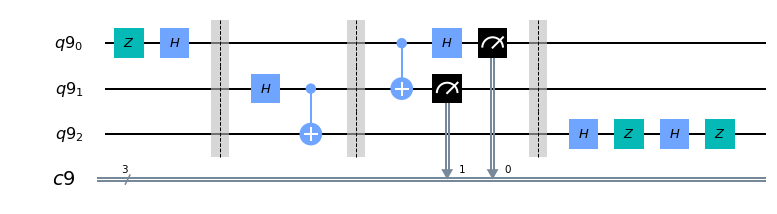

In [35]:
apply_secret_unitary(secret, q[2], qc, dagger=1)
qc.draw(output='mpl')


{'010': 246, '000': 270, '001': 234, '011': 274}


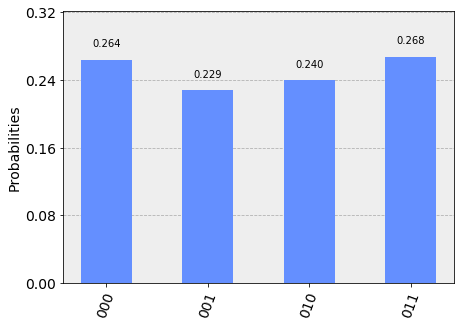

In [36]:


backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

